## Some simple examples with PRA-socp
#### Projection and rescaling algorithm for second-order conic systems

In [1]:
import numpy as np
import time
import pandas as pd
from PRAalgos import Cone,PRA,PRAcpversion,NaiveInstance,ControlledInstance
from PRAtests import experiments,comparePRA,comparison

#### Create a cone, a naive random instance, and center of the cone

In [2]:
r = 10; d = 10 ; dim = np.ones(r)*d ; dim = dim.astype(int);
K = Cone(dim) ; n = sum(K.dim) ; 
m = n/2 ; m = m.astype(int) ;
A,AA = NaiveInstance(m,sum(K.dim)) ; 
u0 = np.zeros(n) ; u0[K.sdim] = 1 ; u0 = u0/(2*sum(u0))

#### Run PRA algorithm and report results

In [3]:
feas,xL,xLperp,k,Total = PRA(A, AA, K, u0)
print('number of rescalings steps = ', k, ',  number of iterations = ',Total)
if (feas == 1): 
    print('found solution in L \cap K') 
    print('norm(xL) = ',str(np.linalg.norm(xL)))    
    print('norm(A@xL) = ', str(np.linalg.norm(A@xL)))
elif (feas == 2): 
    print('found solution in Lperp \cap K') 
    print('norm(xLperp) = ',str(np.linalg.norm(xLperp)))    
    print('norm(AA@xLperp) = ', str(np.linalg.norm(AA@xLperp)))
else:
    print('PRA failed')

number of rescalings steps =  2 ,  number of iterations =  59
found solution in Lperp \cap K
norm(xLperp) =  0.9999999999999999
norm(AA@xLperp) =  2.5384667166290867e-15


#### Compare with cvxpy version

In [4]:
xL,xLperp,feas = PRAcpversion(A,AA,K,solver = 'MOSEK')
if (feas == 1): 
    print('found solution in L \cap K') 
    print('norm(xL) = ',str(np.linalg.norm(xL)))
    print('norm(A@xL) = ', str(np.linalg.norm(A@xL)))
elif (feas == 2): 
    print('found solution in Lperp \cap K') 
    print('norm(xLperp) = ',str(np.linalg.norm(xLperp)))
    print('norm(AA@xLperp) = ', str(np.linalg.norm(AA@xLperp)))
else:
    print('PRAcpversion failed')     

found solution in Lperp \cap K
norm(xLperp) =  1.0
norm(AA@xLperp) =  1.9204767832858612e-16


#### Run some experiments to compare PRA with GUROBI, ECOS, SCS on controlled instances

In [5]:
deltaset = (1,0.1,0.01,0.001) ; N = 5
rset = (5,10,20) ; n = 100
compsuccess,compCPU,largestnorm,smallestminev = comparison(rset,n,deltaset,N)

Running experiments for N = 5, r = 5, n = 100, delta = 1
Set parameter Username
Academic license - for non-commercial use only - expires 2022-08-12


/Users/javipena/opt/anaconda3/lib/python3.9/site-packages/ecos/ecos.py:26: UserWarning: Converting G to a CSC matrix; may take a while.
  warn("Converting G to a CSC matrix; may take a while.")
/Users/javipena/opt/anaconda3/lib/python3.9/site-packages/ecos/ecos.py:29: UserWarning: Converting A to a CSC matrix; may take a while.
  warn("Converting A to a CSC matrix; may take a while.")


Running experiments for N = 5, r = 10, n = 100, delta = 1
Running experiments for N = 5, r = 20, n = 100, delta = 1
Running experiments for N = 5, r = 5, n = 100, delta = 0.1
Running experiments for N = 5, r = 10, n = 100, delta = 0.1
Running experiments for N = 5, r = 20, n = 100, delta = 0.1
Running experiments for N = 5, r = 5, n = 100, delta = 0.01
Running experiments for N = 5, r = 10, n = 100, delta = 0.01
Running experiments for N = 5, r = 20, n = 100, delta = 0.01
Running experiments for N = 5, r = 5, n = 100, delta = 0.001
Running experiments for N = 5, r = 10, n = 100, delta = 0.001
Running experiments for N = 5, r = 20, n = 100, delta = 0.001


 Proportion of instances solved successfully

          PRA  GUROBI  MOSEK  ECOS
delta r                           
0.001 5   1.0     1.0    1.0   0.0
      10  1.0     1.0    1.0   0.0
      20  1.0     1.0    1.0   0.2
0.010 5   1.0     1.0    1.0   0.8
      10  1.0     1.0    1.0   1.0
      20  1.0     1.0    1.0   0.8
0.100 5   

#### Run experiments as in the paper

Running experiments for N = 5, r = 3, n = 9, delta = 1.0
Running experiments for N = 5, r = 3, n = 15, delta = 1.0
Running experiments for N = 5, r = 3, n = 27, delta = 1.0
Running experiments for N = 5, r = 3, n = 30, delta = 1.0
Running experiments for N = 5, r = 3, n = 36, delta = 1.0
Running experiments for N = 5, r = 5, n = 15, delta = 1.0
Running experiments for N = 5, r = 5, n = 25, delta = 1.0
Running experiments for N = 5, r = 5, n = 45, delta = 1.0
Running experiments for N = 5, r = 5, n = 50, delta = 1.0
Running experiments for N = 5, r = 5, n = 60, delta = 1.0
Running experiments for N = 5, r = 9, n = 27, delta = 1.0
Running experiments for N = 5, r = 9, n = 45, delta = 1.0
Running experiments for N = 5, r = 9, n = 81, delta = 1.0
Running experiments for N = 5, r = 9, n = 90, delta = 1.0
Running experiments for N = 5, r = 9, n = 108, delta = 1.0
Running experiments for N = 5, r = 10, n = 30, delta = 1.0
Running experiments for N = 5, r = 10, n = 50, delta = 1.0
Running expe

Running experiments for N = 5, r = 10, n = 35, delta = 0.5
Running experiments for N = 5, r = 10, n = 48, delta = 0.5
Running experiments for N = 5, r = 10, n = 56, delta = 0.5
Running experiments for N = 5, r = 10, n = 77, delta = 0.5
Running experiments for N = 5, r = 12, n = 33, delta = 0.5
Running experiments for N = 5, r = 12, n = 42, delta = 0.5
Running experiments for N = 5, r = 12, n = 57, delta = 0.5
Running experiments for N = 5, r = 12, n = 56, delta = 0.5
Running experiments for N = 5, r = 12, n = 98, delta = 0.5
Running experiments for N = 5, r = 3, n = 8, delta = 0.2
Running experiments for N = 5, r = 3, n = 12, delta = 0.2
Running experiments for N = 5, r = 3, n = 17, delta = 0.2
Running experiments for N = 5, r = 3, n = 27, delta = 0.2
Running experiments for N = 5, r = 3, n = 18, delta = 0.2
Running experiments for N = 5, r = 5, n = 13, delta = 0.2
Running experiments for N = 5, r = 5, n = 16, delta = 0.2
Running experiments for N = 5, r = 5, n = 28, delta = 0.2
Runnin

/Users/javipena/Dropbox/_WorkingPapers/_EPRAsecond/Python/LATESTcode/PRAtests.py:458: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.yaxis.set_major_formatter(y_formatter)


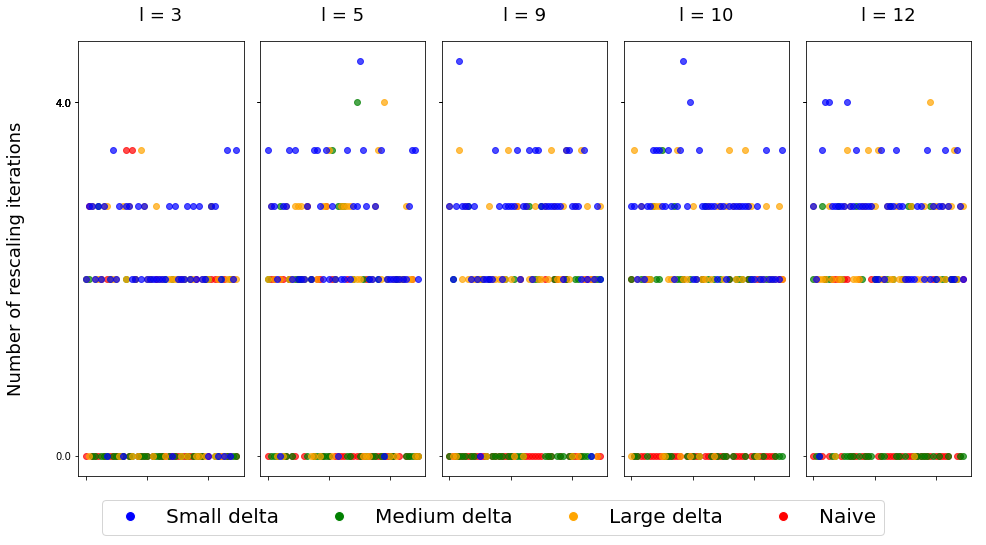

/Users/javipena/Dropbox/_WorkingPapers/_EPRAsecond/Python/LATESTcode/PRAtests.py:458: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.yaxis.set_major_formatter(y_formatter)


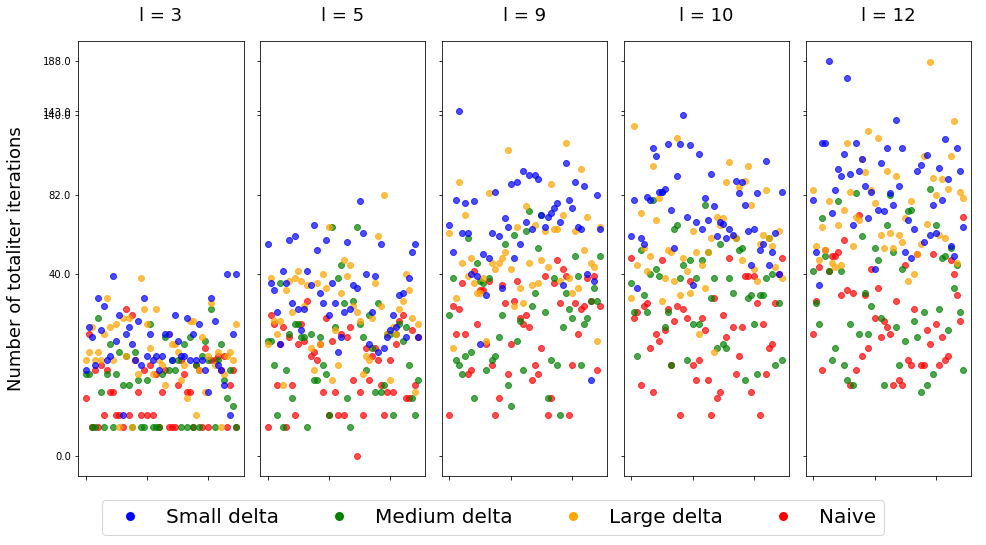

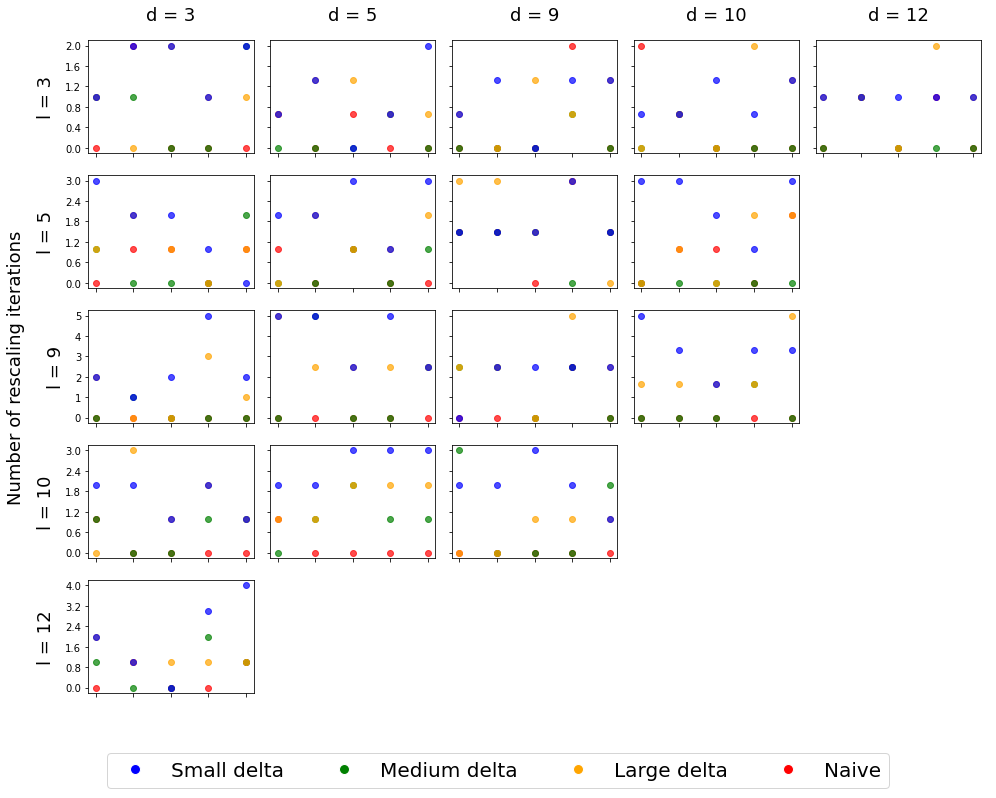

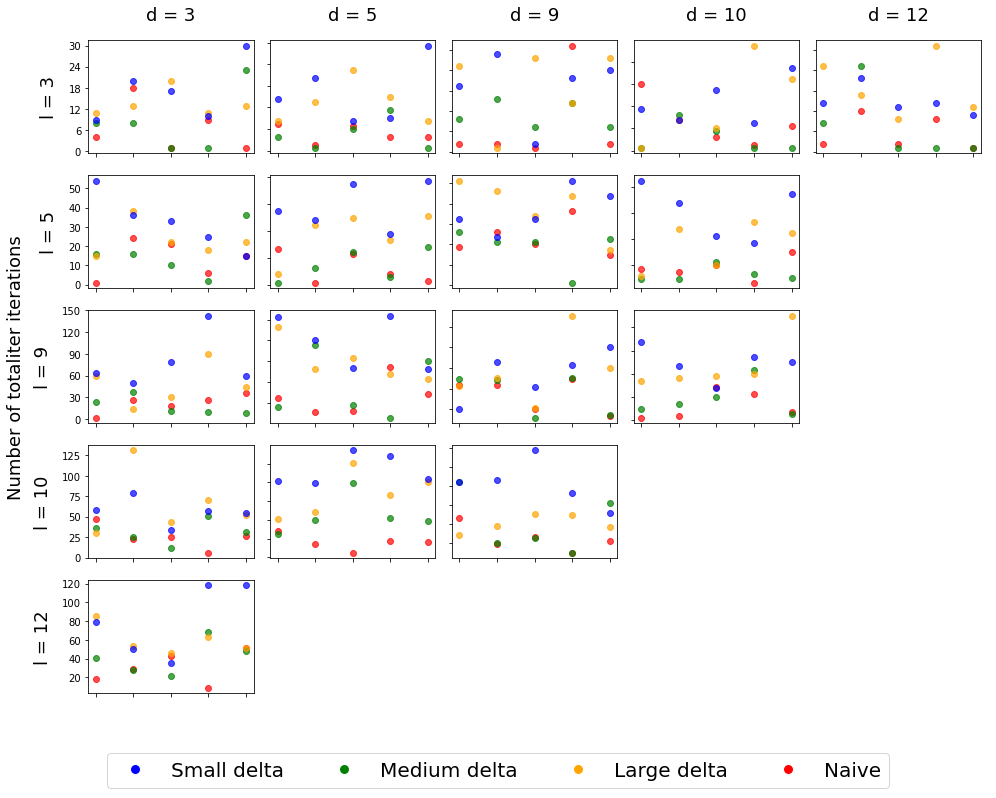

In [6]:
N = 5
lset = (3, 5, 9, 10, 12)
dset = lset
deltaset = (1.000, 0.500, 0.20, 0.1)
limdim = 200
dsum,dfResult = experiments(lset,dset,deltaset,N,limdim)

In [7]:
pwd

'/Users/javipena/Dropbox/_WorkingPapers/_EPRAsecond/Python/LATESTcode'